Introduction

<h>Diabetes mellitus</h>

Diabetes mellitus (DM), commonly known as diabetes, is a group of metabolic disorders characterized by a high blood sugar level over a prolonged period of time.
If left untreated, diabetes can cause many complications. Acute complications can include diabetic ketoacidosis, hyperosmolar hyperglycemic state, or death. Serious long-term complications include cardiovascular disease, stroke, chronic kidney disease, foot ulcers, damage to the nerves, damage to the eyes and cognitive impairment.

Diabetes is due to either the pancreas not producing enough insulin, or the cells of the body not responding properly to the insulin produced. There are three main types of diabetes mellitus:

Type 1 diabetes results from the pancreas's failure to produce enough insulin due to loss of beta cells. This form was previously referred to as "insulin-dependent diabetes mellitus" (IDDM) or "juvenile diabetes". The loss of beta cells is caused by an autoimmune response. The cause of this autoimmune response is unknown.
Type 2 diabetes begins with insulin resistance, a condition in which cells fail to respond to insulin properly. As the disease progresses, a lack of insulin may also develop. This form was previously referred to as "non insulin-dependent diabetes mellitus" (NIDDM) or "adult-onset diabetes". The most common cause is a combination of excessive body weight and insufficient exercise.
Gestational diabetes is the third main form, and occurs when pregnant women without a previous history of diabetes develop high blood sugar levels.
Source-Wikipedia

I wanted to do some data exploration and to keep it simple I wanted to create some plots using the famous Pima Indians Diabetes Database from kaggle which can be downloaded from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database?select=diabetes.csv).

In [1]:
#loading libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
data=pd.read_csv('diabetes.csv')


Since I am using Pandas Dataframe to explore the csv data, we can easily view the data types as well as simple insight behind the data, such as the mean or std values.


In [3]:

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Right away we can see that all of the data are composed of numerical values, the fact that we have 768 rows and 9 Columns, and no null values. We see 8 of numerical columns and 1 Boolean column (which is our dependent variable)

 Data visualization


Question 1
What proportion of people report they have diabetes (according to given sample of data)?

In [7]:
# Analysing the Outcome
# To get the number of diabetic and Healthy person
data.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

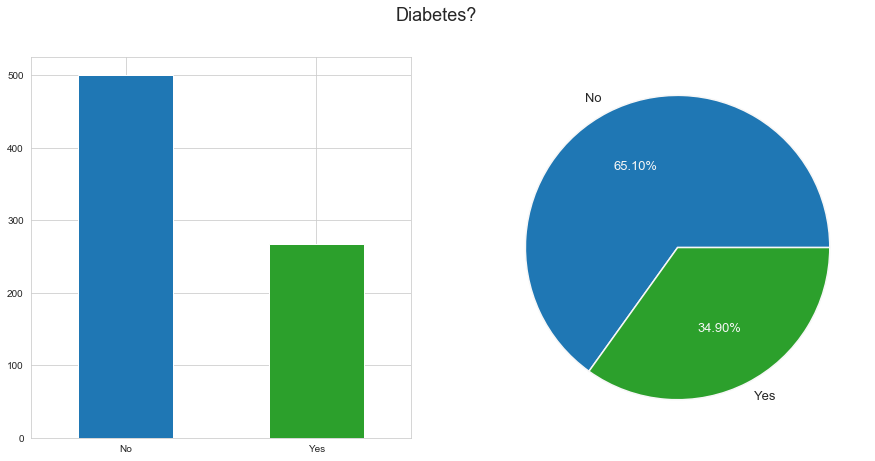

In [8]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = data.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = data.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")


I wanted to take a look at how each columns are correlated to one another.Lighter areas suggest more correlation and similarly darker areas suggest very little or no correlation. And we can observe that the Outcome column is highly correlated with Glucose, BMI and age



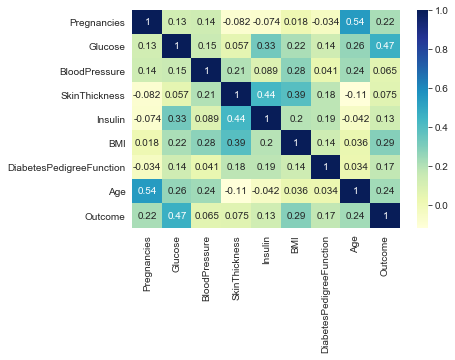

In [9]:
corr = data[data.columns].corr()
sns.heatmap(corr,cmap="YlGnBu", annot = True)

Plotting histograms to see the variables of two different outcomes

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

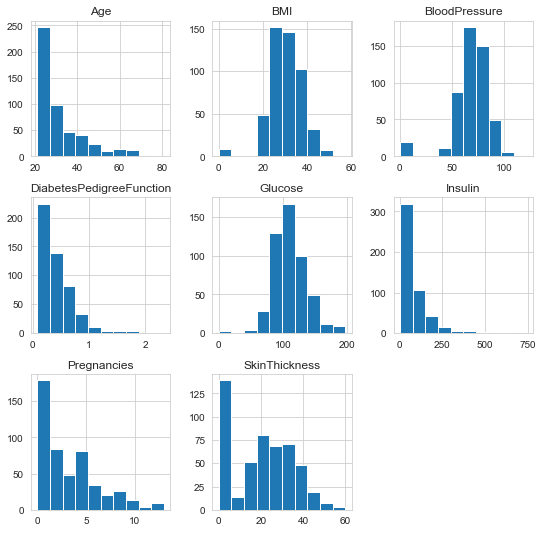

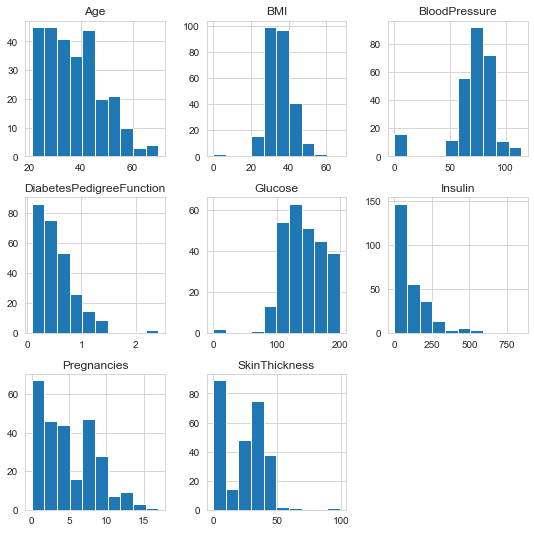

In [10]:
sns.color_palette("cubehelix_r")
data.groupby('Outcome').hist(figsize=(9, 9))
#First set of graphs represent data when Outcome=0,ie non -diabetic
#Second set of graphs represent data when Outcome=1,ie diabetic

Plotting to see how the blood pressure varies between diabetic and non diabetic

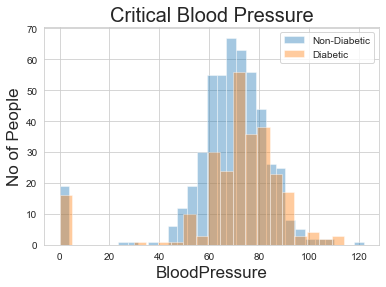

In [11]:
sns.color_palette("cubehelix_r")
sns.distplot(data.loc[data['Outcome']==0]['BloodPressure'],label='Non-Diabetic',kde=False)
sns.distplot(data.loc[data['Outcome']==1]['BloodPressure'],label='Diabetic',kde=False)
plt.title('Critical Blood Pressure',fontsize=20)
plt.xlabel('BloodPressure',fontsize=17)
plt.legend()
plt.ylabel('No of People',fontsize=17)
plt.show()



Plotting to see how the BMI varies between diabetic and non diabetic

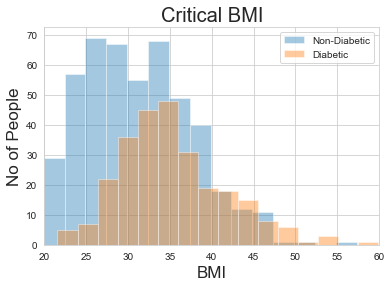

In [12]:
sns.color_palette("cubehelix_r")
sns.distplot(data.loc[data['Outcome']==0]['BMI'],label='Non-Diabetic',kde=False)
sns.distplot(data.loc[data['Outcome']==1]['BMI'],label='Diabetic',kde=False)
plt.xlim(20,60)
plt.title('Critical BMI',fontsize=20)
plt.xlabel('BMI',fontsize=17)
plt.legend()
plt.ylabel('No of People',fontsize=17)
plt.show()



Plotting to see how the Glucose varies between diabetic and non diabetic

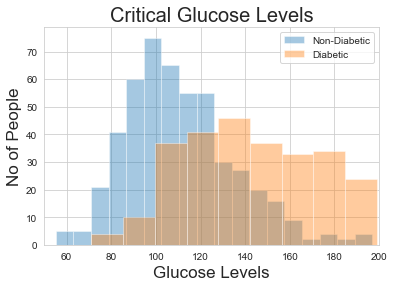

In [13]:
sns.color_palette("cubehelix_r")
sns.distplot(data.loc[data['Outcome']==0]['Glucose'],label='Non-Diabetic',kde=False)
sns.distplot(data.loc[data['Outcome']==1]['Glucose'],label='Diabetic',kde=False)
plt.xlim(50,200)
plt.title('Critical Glucose Levels',fontsize=20)
plt.xlabel('Glucose Levels',fontsize=17)
plt.legend()
plt.ylabel('No of People',fontsize=17)
plt.show()

Plotting box plot to see difference in skin thickness of diabetic and non diabetic

No handles with labels found to put in legend.


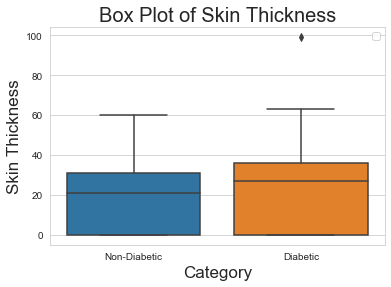

In [14]:
sns.color_palette("cubehelix_r")
sns.boxplot(x='Outcome',y='SkinThickness',data=data)
plt.title('Box Plot of Skin Thickness',fontsize=20)
plt.xlabel('Category',fontsize=17)
plt.legend()
plt.ylabel('Skin Thickness',fontsize=17)
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'])
plt.show()

Plotting correlation graphs

Text(0.5, 1.0, 'Correlation between Diabetes PF function and age by BMI numbers')

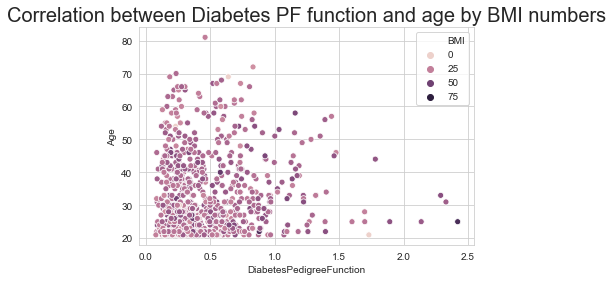

In [15]:
sns.color_palette("cubehelix_r")
sns.scatterplot(x="DiabetesPedigreeFunction", y="Age", hue="BMI", data=data)
plt.title('Correlation between Diabetes PF function and age by BMI numbers',fontsize=20)

Text(0.5, 1.0, 'Correlation between Diabetes PF function and age by Glucose numbers')

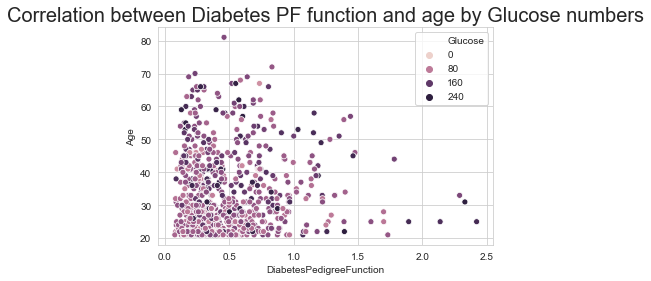

In [16]:
sns.scatterplot(x="DiabetesPedigreeFunction", y="Age", hue="Glucose", data=data)
plt.title('Correlation between Diabetes PF function and age by Glucose numbers',fontsize=20)


Pair Plots

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. It also helps to form some simple classification models by drawing some simple lines or make linear separation in our dataset.



In [17]:
#sns.pairplot(data=data,hue='Outcome',palette='icefire_r')

Question:What is the average trend of other parameters  with age

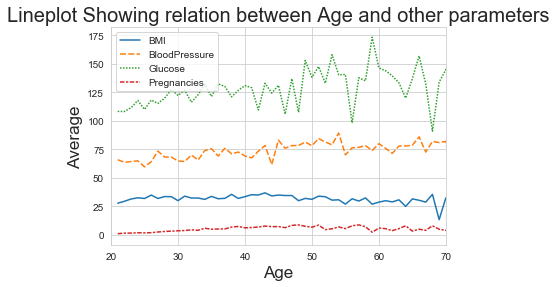

In [18]:
sns.color_palette("cubehelix_r")
plot_data=data[['BloodPressure','Age','BMI','Pregnancies','Glucose']]
line_data=pd.pivot_table(plot_data ,values=['BloodPressure','Age','Pregnancies','Glucose'],
                  index=['Age'], aggfunc=np.mean)
sns.lineplot(data=line_data)
plt.xlim(20,70)
plt.title('Lineplot Showing relation between Age and other parameters',fontsize=20)
plt.xlabel('Age',fontsize=17)
plt.legend()
plt.ylabel('Average',fontsize=17)
plt.show()


Lets look further at individual parameters and their association with other variables.Beginning with Glucose

Joint plot of Glucose with Other Variables ==> 

Correlation between Glucose and Pregnancies ==>  0.129458671499273


<Figure size 500x400 with 0 Axes>

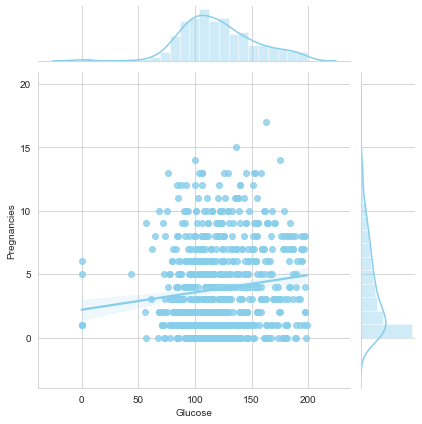

Correlation between Glucose and BloodPressure ==>  0.15258958656866448


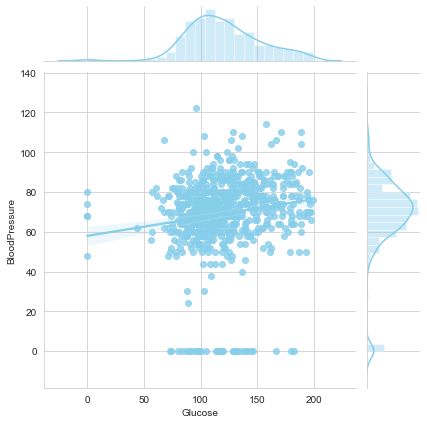

Correlation between Glucose and SkinThickness ==>  0.057327890738176825


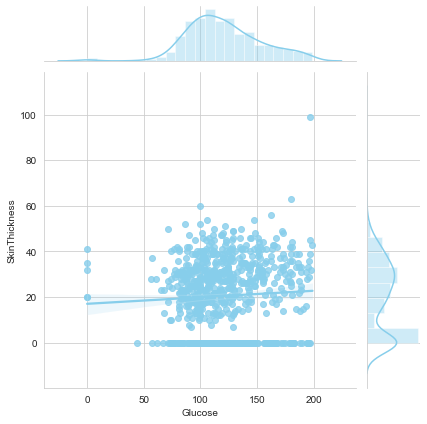

Correlation between Glucose and Insulin ==>  0.3313571099202081


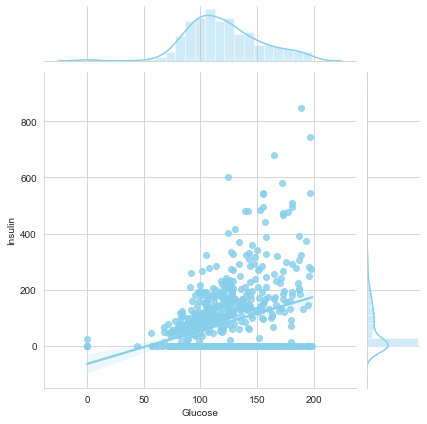

Correlation between Glucose and BMI ==>  0.22107106945898305


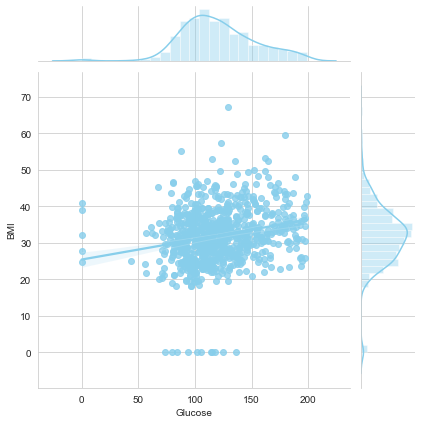

Correlation between Glucose and DiabetesPedigreeFunction ==>  0.1373372998283708


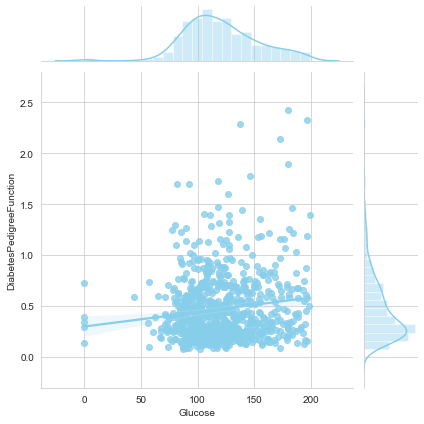

Correlation between Glucose and Age ==>  0.26351431982433376


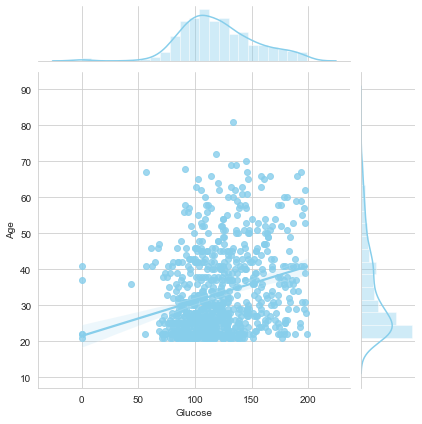

In [19]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Glucose with Other Variables ==> \n")
for i in  data.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Glucose and {i} ==> ",data.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=data,kind = 'regression',color = 'skyblue')
        plt.show()

Glucose shows positive weak linear association with other variable in given dataset. 
That means On increasing Glucose level in patients, Other variables will also increase

Conclusion

The body structure (BMI and TSF) and metabolism (Plasma Glucose and Serum Insulin) are significant indicators of diabetes and population health.

Among the 34.9% diabetics most had high BMI, TSF, and Glucose numbers

Average BMI of the population was 32 and average plasma glucose 121

Younger population (patients in age-group 20–30 years) is more at risk of diabetes and health in general.

Glucose shows positive weak linear association with other variable in given dataset. That means On increasing Glucose level in patients, Other variables will also increase


